In [4]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')

In [12]:
business = pd.read_json('../datasets/yelp_academic_dataset_business.json', lines=True, encoding='utf8')

In [13]:
checkin = pd.read_json('../datasets/yelp_academic_dataset_checkin.json', lines=True, encoding='utf8')

In [14]:
review = pd.read_json('../datasets/yelp_academic_dataset_review.json', lines=True, encoding='utf8')

In [15]:
tip = pd.read_json('../datasets/yelp_academic_dataset_tip.json', lines=True, encoding='utf8')

In [16]:
user = pd.read_json('../datasets/yelp_academic_dataset_user.json', lines=True, encoding='utf8')

# Business Dataset

In [ ]:
{
    "business_id":"encrypted business id",
    "name":"business name",
    "neighborhood":"hood name",
    "address":"full address",
    "city":"city",
    "state":"state -- if applicable --",
    "postal code":"postal code",
    "latitude":latitude,
    "longitude":longitude,
    "stars":star rating, ***rounded to half-stars***,
    "review_count":number of reviews,
    "is_open":0/1 (closed/open),
    "attributes":["an array of strings: each array element is an attribute"],
    "categories":["an array of strings of business categories"],
    "hours":["an array of strings of business hours"],
    "type": "business"
}

In [53]:
'Size of the business dataset: ' + str(len(business))

'Size of the business dataset: 144072'

In [66]:
business.columns

Index([u'address', u'attributes', u'business_id', u'categories', u'city',
       u'hours', u'is_open', u'latitude', u'longitude', u'name',
       u'neighborhood', u'postal_code', u'review_count', u'stars', u'state',
       u'type'],
      dtype='object')

In [115]:
business['attributes'][12]

[u'BikeParking: True', u"BusinessParking: {'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}", u'RestaurantsPriceRange2: 1']

In [121]:
business['categories'][20]

[u'Sports Clubs', u'Active Life']

In [73]:
business.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
0,"227 E Baseline Rd, Ste J2","[BikeParking: True, BusinessAcceptsBitcoin: Fa...",0DI8Dt2PJp07XkVvIElIcQ,"[Tobacco Shops, Nightlife, Vape Shops, Shopping]",Tempe,"[Monday 11:0-21:0, Tuesday 11:0-21:0, Wednesda...",0,33.378214,-111.936102,Innovative Vapors,,85283,17,4.5,AZ,business
1,495 S Grand Central Pkwy,"[BusinessAcceptsBitcoin: False, BusinessAccept...",LTlCaCGZE14GuaUXUGbamg,"[Caterers, Grocery, Food, Event Planning & Ser...",Las Vegas,"[Monday 0:0-0:0, Tuesday 0:0-0:0, Wednesday 0:...",1,36.192284,-115.159272,Cut and Taste,,89106,9,5.0,NV,business
2,979 Bloor Street W,"[Alcohol: none, Ambience: {'romantic': False, ...",EDqCEAGXVGCH4FJXgqtjqg,"[Restaurants, Pizza, Chicken Wings, Italian]",Toronto,"[Monday 11:0-2:0, Tuesday 11:0-2:0, Wednesday ...",1,43.661054,-79.429089,Pizza Pizza,Dufferin Grove,M6H 1L5,7,2.5,ON,business
3,7014 Steubenville Pike,"[AcceptsInsurance: False, BusinessAcceptsCredi...",cnGIivYRLxpF7tBVR_JwWA,"[Hair Removal, Beauty & Spas, Blow Dry/Out Ser...",Oakdale,"[Tuesday 10:0-21:0, Wednesday 10:0-21:0, Thurs...",1,40.444544,-80.174540,Plush Salon and Spa,,15071,4,4.0,PA,business
4,321 Jarvis Street,"[BusinessAcceptsCreditCards: True, Restaurants...",cdk-qqJ71q6P7TJTww_DSA,"[Hotels & Travel, Event Planning & Services, H...",Toronto,None,1,43.659829,-79.375401,Comfort Inn,Downtown Core,M5B 2C2,8,3.0,ON,business


### Open/Closed

In [60]:
'Percentage of open businesses: ' + str(business['is_open'].sum() / float(len(business)))

'Percentage of open businesses: 0.850304014659'

### City and State

In [20]:
len(business.city.unique())

878

In [30]:
business['city'].value_counts().head(10)

Las Vegas     22892
Toronto       14540
Phoenix       14468
Scottsdale     6917
Charlotte      6912
Pittsburgh     5275
Montréal       4785
Mesa           4714
Henderson      3788
Tempe          3703
Name: city, dtype: int64

In [31]:
business['city'].value_counts().tail(10)

Buckeye - Shaker          1
East Mesa                 1
Broadlands                1
Vilas                     1
Pencaitland               1
Morriston                 1
Charlotte (University)    1
Malton                    1
Reminderville             1
                          1
Name: city, dtype: int64

In [81]:
len(business.state.unique())

29

In [82]:
business['state'].value_counts().head(10)

AZ     43492
NV     28214
ON     24507
NC     10177
OH      9966
PA      8091
QC      6668
WI      3899
EDH     3539
BW      2905
Name: state, dtype: int64

In [83]:
business['state'].value_counts().tail(10)

ESX    11
SCB     3
FLN     1
PKN     1
STG     1
KHL     1
VT      1
NLK     1
NTH     1
FAL     1
Name: state, dtype: int64

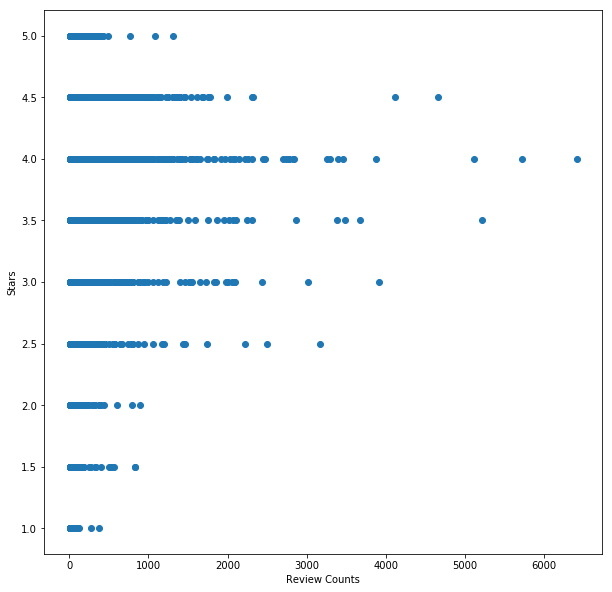

In [79]:
plt.figure(figsize=(10,10))
plt.scatter(business['review_count'], business['stars'])
plt.xlabel('Review Counts')
plt.ylabel('Stars')
plt.show()

In [93]:
business.groupby('state').median()['review_count']

state
AZ      9.0
BW      6.0
EDH     7.0
ELN     4.0
ESX     5.0
FAL    11.0
FIF     4.0
FLN     5.0
HLD     5.0
IL      8.0
KHL     7.0
MLN     5.0
NC      8.0
NI      4.5
NLK     3.0
NTH    17.0
NV     12.0
NY      5.0
OH      7.0
ON      8.0
PA      8.0
PKN    24.0
QC      7.0
SC      6.5
SCB     6.0
STG     3.0
VT      4.0
WI      8.0
WLN     4.0
Name: review_count, dtype: float64

In [95]:
business.groupby('state').median()['stars']

state
AZ     4.0
BW     4.0
EDH    4.0
ELN    4.0
ESX    4.0
FAL    4.0
FIF    3.5
FLN    4.5
HLD    4.0
IL     3.5
KHL    3.5
MLN    4.0
NC     3.5
NI     4.0
NLK    3.5
NTH    2.0
NV     4.0
NY     3.5
OH     3.5
ON     3.5
PA     3.5
PKN    3.5
QC     4.0
SC     3.5
SCB    4.0
STG    4.5
VT     5.0
WI     4.0
WLN    3.5
Name: stars, dtype: float64

In [107]:
business[business['business_id'] == '2LfIuF3_sX6uwe-IR-P0jQ']

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state,type
70810,4610 N 7th Ave,"[BikeParking: True, BusinessAcceptsCreditCards...",2LfIuF3_sX6uwe-IR-P0jQ,"[Home & Garden, Antiques, Home Decor, Shopping]",Phoenix,"[Monday 11:0-17:0, Tuesday 11:0-17:0, Wednesda...",0,33.504054,-112.082813,Modern On Melrose,,85013,15,4.0,AZ,business


In [140]:
business.describe()

,is_open,latitude,longitude,review_count,stars
count,144072.000000,144072.000000,144072.000000,144072.000000,144072.000000
mean,0.850304,38.644758,-92.690002,28.825511,3.637709
std,0.356774,5.344079,26.898355,92.574711,0.969585
min,0.000000,32.998019,-122.397206,3.000000,1.000000
25%,1.000000,33.627346,-112.136907,4.000000,3.000000
50%,1.000000,36.143417,-89.523207,9.000000,3.500000
75%,1.000000,43.611192,-79.649855,22.000000,4.500000
max,1.000000,57.592285,115.086769,6414.000000,5.000000


# Review

In [ ]:
{
    "review_id":"encrypted review id",
    "user_id":"encrypted user id",
    "business_id":"encrypted business id",
    "stars":star rating, rounded to half-stars,
    "date":"date formatted like 2009-12-19",
    "text":"review text",
    "useful":number of useful votes received,
    "funny":number of funny votes received,
    "cool": number of cool review votes received,
    "type": "review"
}

https://www.yelp.com/dataset_challenge
https://www.yelp-support.com/Recommended_Reviews
9. Why is the user review count different than the actual number of reviews returned for that user?
The review count represents the total number of reviews a user had posted at the time of data collection, whether Yelp recommended them or not. As for the reviews, only the reviews that were recommended at the time of data collection are included. Also, we only include businesses that have had at least 3 reviews older than 14 days. So the review count number may differ from the number of actual reviews for any given user.

In [102]:
len(review)

4153150

In [98]:
review.head()

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2aFiy99vNLklCx3T_tGS9A,0,2011-10-10,0,NxL8SIC5yqOdnlXCg18IBg,5,If you enjoy service by someone who is as comp...,review,0,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,0,2010-12-29,0,pXbbIgOXvLuTi_SPs1hQEQ,5,After being on the phone with Verizon Wireless...,review,1,bQ7fQq1otn9hKX-gXRsrgA
2,2aFiy99vNLklCx3T_tGS9A,0,2011-04-29,0,wslW2Lu4NYylb1jEapAGsw,5,Great service! Corey is very service oriented....,review,0,r1NUhdNmL6yU9Bn-Yx6FTw
3,2LfIuF3_sX6uwe-IR-P0jQ,1,2014-07-14,0,GP6YEearUWrzPtQYSF1vVg,5,Highly recommended. Went in yesterday looking ...,review,0,aW3ix1KNZAvoM8q-WghA3Q
4,2LfIuF3_sX6uwe-IR-P0jQ,0,2014-01-15,0,25RlYGq2s5qShi-pn3ufVA,4,I walked in here looking for a specific piece ...,review,0,YOo-Cip8HqvKp_p9nEGphw


In [101]:
review['useful'].max()

1125

In [123]:
review[review['business_id'] == '2LfIuF3_sX6uwe-IR-P0jQ']['stars'].mean()

4.2000000000000002

In [125]:
review[review['business_id'] == '2aFiy99vNLklCx3T_tGS9A']

,business_id,cool,date,funny,review_id,stars,text,type,useful,user_id
0,2aFiy99vNLklCx3T_tGS9A,0,2011-10-10,0,NxL8SIC5yqOdnlXCg18IBg,5,If you enjoy service by someone who is as comp...,review,0,KpkOkG6RIf4Ra25Lhhxf1A
1,2aFiy99vNLklCx3T_tGS9A,0,2010-12-29,0,pXbbIgOXvLuTi_SPs1hQEQ,5,After being on the phone with Verizon Wireless...,review,1,bQ7fQq1otn9hKX-gXRsrgA
2,2aFiy99vNLklCx3T_tGS9A,0,2011-04-29,0,wslW2Lu4NYylb1jEapAGsw,5,Great service! Corey is very service oriented....,review,0,r1NUhdNmL6yU9Bn-Yx6FTw


In [128]:
len(review['review_id'].unique())

4153150

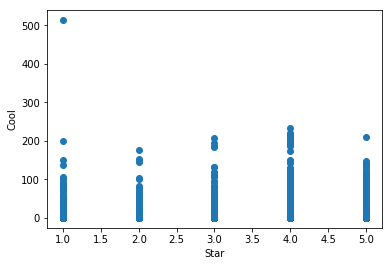

In [131]:
plt.scatter(review['stars'], review['cool'])
plt.xlabel('Star')
plt.ylabel('Cool')
plt.show()

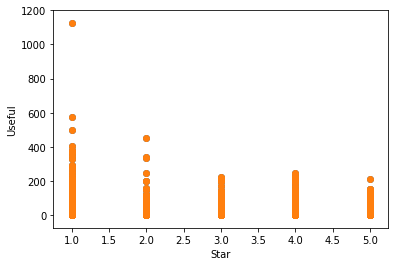

In [133]:
plt.scatter(review['stars'], review['useful'])
plt.xlabel('Star')
plt.ylabel('Useful')
plt.show()

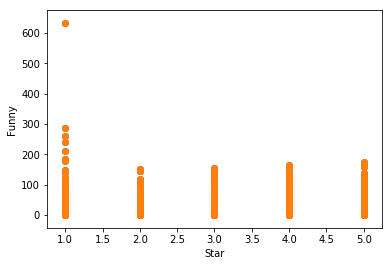

In [135]:
plt.scatter(review['stars'], review['funny'])
plt.xlabel('Star')
plt.ylabel('Funny')
plt.show()

In [141]:
review.describe()

,cool,funny,stars,useful
count,4.153150e+06,4.153150e+06,4.153150e+06,4.153150e+06
mean,5.262232e-01,4.194826e-01,3.722765e+00,1.008271e+00
std,1.914351e+00,1.721744e+00,1.405131e+00,2.585058e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
max,5.130000e+02,6.320000e+02,5.000000e+00,1.125000e+03


# User

In [ ]:
{
    "user_id":"encrypted user id",
    "name":"first name",
    "review_count":number of reviews,
    "yelping_since": date formatted like "2009-12-19",
    "friends":["an array of encrypted ids of friends"],
    "useful":"number of useful votes sent by the user",
    "funny":"number of funny votes sent by the user",
    "cool":"number of cool votes sent by the user",
    "fans":"number of fans the user has",
    "elite":["an array of years the user was elite"],
    "average_stars":floating point average like 4.31,
    "compliment_hot":number of hot compliments received by the user,
    "compliment_more":number of more compliments received by the user,
    "compliment_profile": number of profile compliments received by the user,
    "compliment_cute": number of cute compliments received by the user,
    "compliment_list": number of list compliments received by the user,
    "compliment_note": number of note compliments received by the user,
    "compliment_plain": number of plain compliments received by the user,
    "compliment_cool": number of cool compliments received by the user,
    "compliment_funny": number of funny compliments received by the user,
    "compliment_writer": number of writer compliments received by the user,
    "compliment_photos": number of photo compliments received by the user,
    "type":"user"
}

https://www.yelp.com/elite

In [142]:
len(user)

1029432

In [138]:
user.columns

Index([u'average_stars', u'compliment_cool', u'compliment_cute',
       u'compliment_funny', u'compliment_hot', u'compliment_list',
       u'compliment_more', u'compliment_note', u'compliment_photos',
       u'compliment_plain', u'compliment_profile', u'compliment_writer',
       u'cool', u'elite', u'fans', u'friends', u'funny', u'name',
       u'review_count', u'type', u'useful', u'user_id', u'yelping_since'],
      dtype='object')

In [136]:
user.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,elite,fans,friends,funny,name,review_count,type,useful,user_id,yelping_since
0,3.59,4192,79,4192,3904,19,305,4705,1347,2617,...,"[2017, 2015, 2016, 2014, 2011, 2013, 2012]",298,"[iJg9ekPzF9lkMuvjKYX6uA, ctWAuzS04Xu0lke2Rop4l...",12316,Rob,761,user,18456,EZmocAborM6z66rTzeZxzQ,2009-09-12
1,4.29,144,11,144,64,1,4,97,24,129,...,[None],34,"[r2UUCzGxqI6WPsiWPgqG2A, qewG3X2O4X6JKskxyyqFw...",28,Vivian,80,user,117,myql3o3x22_ygECb8gVo7A,2009-06-27
2,4.15,36,1,36,14,2,10,21,4,23,...,"[2011, 2016, 2017, 2013, 2014, 2015, 2012]",48,"[qewG3X2O4X6JKskxyyqFwQ, -50XWnmQGqBgEI-9ANvLl...",6,Carol,841,user,58,FIk4lQQu1eTe2EpzQ4xhBA,2010-08-26
3,3.82,54,6,54,32,0,5,13,1,29,...,"[2014, 2010, 2017, 2015, 2011, 2016, 2013, 201...",28,"[AIhfuFmX62k7a22gXXAB2Q, kQ1jU2rDpFD_q54edEmwI...",51,Miss Maggie,376,user,42,ojovtd9c8GIeDiB8e0mq2w,2008-05-31
4,2.97,0,0,0,0,0,0,0,0,0,...,[None],2,"[bvZkBCY-AvCsxRjd6Q-vEQ, KNEVNYeyNZApXG6HqOdsR...",3,Jeremy,28,user,8,uVEoZmmL9yK0NMgadLL0CQ,2013-01-17


In [158]:
user.select_dtypes(include=['number']).columns

Index([u'average_stars', u'compliment_cool', u'compliment_cute',
       u'compliment_funny', u'compliment_hot', u'compliment_list',
       u'compliment_more', u'compliment_note', u'compliment_photos',
       u'compliment_plain', u'compliment_profile', u'compliment_writer',
       u'cool', u'fans', u'funny', u'review_count', u'useful'],
      dtype='object')

In [159]:
user.select_dtypes(include=['number']).corr()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,compliment_profile,compliment_writer,cool,fans,funny,review_count,useful
average_stars,1.000000,0.004955,0.002208,0.004955,0.004424,0.001194,0.002281,0.002279,0.001948,0.004772,0.001850,0.004204,0.004169,0.010477,0.002888,0.010328,0.003633
compliment_cool,0.004955,1.000000,0.637884,1.000000,0.922982,0.524139,0.698514,0.626849,0.692400,0.892175,0.690345,0.925280,0.663084,0.569677,0.689398,0.351760,0.658446
compliment_cute,0.002208,0.637884,1.000000,0.637884,0.645190,0.943909,0.934712,0.448215,0.853470,0.539704,0.892148,0.692343,0.315016,0.277186,0.328745,0.153434,0.314600
compliment_funny,0.004955,1.000000,0.637884,1.000000,0.922982,0.524139,0.698514,0.626849,0.692400,0.892175,0.690345,0.925280,0.663084,0.569677,0.689398,0.351760,0.658446
compliment_hot,0.004424,0.922982,0.645190,0.922982,1.000000,0.488109,0.654516,0.708887,0.657912,0.766171,0.651110,0.849750,0.561949,0.528990,0.589673,0.303549,0.555599
compliment_list,0.001194,0.524139,0.943909,0.524139,0.488109,1.000000,0.951548,0.397535,0.848836,0.458001,0.911373,0.633854,0.243560,0.148062,0.261302,0.103294,0.239819
compliment_more,0.002281,0.698514,0.934712,0.698514,0.654516,0.951548,1.000000,0.511596,0.882017,0.615690,0.964811,0.798392,0.383817,0.274604,0.419339,0.194481,0.381040
compliment_note,0.002279,0.626849,0.448215,0.626849,0.708887,0.397535,0.511596,1.000000,0.483627,0.586514,0.484896,0.603333,0.417652,0.384312,0.440480,0.247417,0.430591
compliment_photos,0.001948,0.692400,0.853470,0.692400,0.657912,0.848836,0.882017,0.483627,1.000000,0.603898,0.853324,0.775588,0.384438,0.224731,0.448318,0.117788,0.370907
compliment_plain,0.004772,0.892175,0.539704,0.892175,0.766171,0.458001,0.615690,0.586514,0.603898,1.000000,0.609914,0.840796,0.677567,0.596729,0.681456,0.352080,0.694519


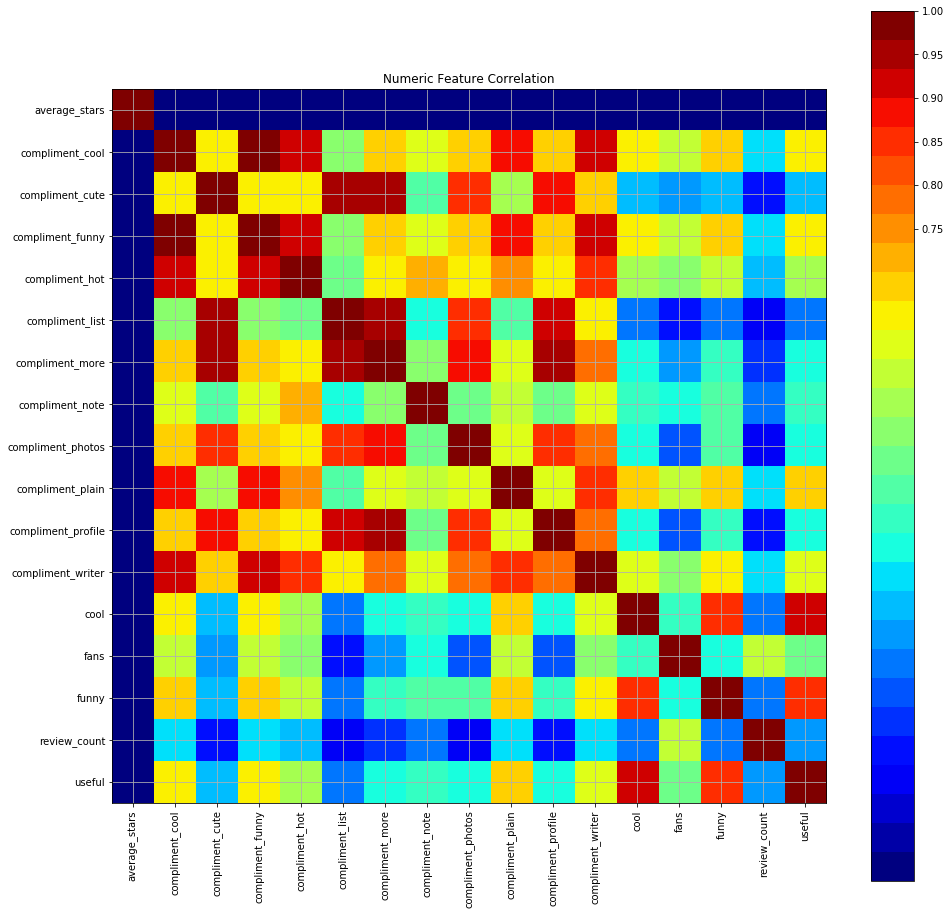

In [163]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,16))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Numeric Feature Correlation')
    labels = user.select_dtypes(include=['number']).columns
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    ax1.set_xticklabels(labels,fontsize=10,rotation=90)
    ax1.set_yticklabels(labels,fontsize=10)
#     Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(user.select_dtypes(include=['number']))

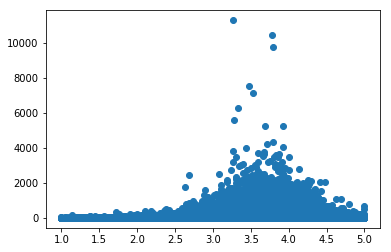

In [165]:
plt.scatter(user['average_stars'], user['review_count'])
plt.show()

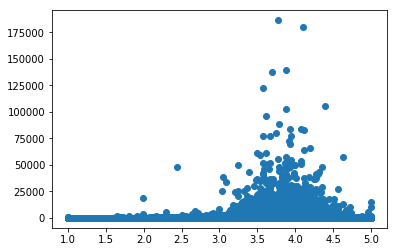

In [166]:
plt.scatter(user['average_stars'], user['useful'])
plt.show()

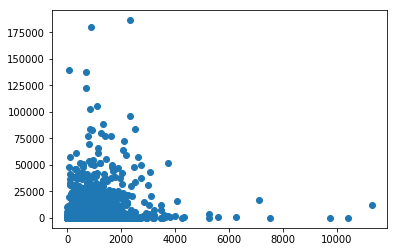

In [167]:
plt.scatter(user['review_count'], user['useful'])
plt.show()

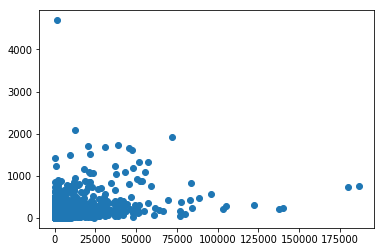

In [168]:
plt.scatter(user['useful'], user['fans'])
plt.show()

# Checkin

In [ ]:
{
    "time":["an array of check ins with the format day-hour:number of check ins from hour to hour+1"],
    "business_id":"encrypted business id",
    "type":"checkin"
}

In [169]:
len(checkin)

125532

In [170]:
checkin.columns

Index([u'business_id', u'time', u'type'], dtype='object')

In [171]:
checkin.head()

,business_id,time,type
0,7KPBkxAOEtb3QeIL9PEErg,"[Fri-0:2, Sat-0:1, Sun-0:1, Wed-0:2, Sat-1:2, ...",checkin
1,kREVIrSBbtqBhIYkTccQUg,"[Mon-13:1, Thu-13:1, Sat-16:1, Wed-17:1, Sun-1...",checkin
2,tJRDll5yqpZwehenzE2cSg,"[Thu-0:1, Mon-1:1, Mon-12:1, Sat-16:1]",checkin
3,nhZ1HGWD8lMErdn3FuWuTQ,"[Fri-0:1, Sat-0:1, Sun-0:1, Thu-0:1, Wed-0:1, ...",checkin
4,8bY6M2yiWOF2ilfmGS34Fw,"[Sat-11:1, Fri-13:1, Thu-14:1]",checkin


In [172]:
checkin['time'][0]

[u'Fri-0:2', u'Sat-0:1', u'Sun-0:1', u'Wed-0:2', u'Sat-1:2', u'Thu-1:1', u'Wed-1:1', u'Sat-2:1', u'Sun-2:2', u'Thu-2:1', u'Wed-2:1', u'Fri-3:1', u'Sun-3:3', u'Thu-4:1', u'Tue-4:1', u'Sun-6:1', u'Wed-6:1', u'Fri-10:1', u'Sat-10:1', u'Mon-11:1', u'Wed-11:2', u'Mon-12:1', u'Sat-12:1', u'Tue-12:1', u'Sat-13:2', u'Thu-13:1', u'Tue-13:2', u'Wed-13:2', u'Fri-14:2', u'Sat-14:1', u'Wed-14:1', u'Fri-15:1', u'Sat-15:1', u'Thu-15:1', u'Tue-15:1', u'Fri-16:1', u'Sat-16:2', u'Sun-16:1', u'Tue-16:1', u'Sat-17:3', u'Sun-17:1', u'Fri-18:1', u'Mon-18:1', u'Sat-18:2', u'Sun-18:1', u'Tue-18:2', u'Wed-18:1', u'Fri-19:2', u'Mon-19:1', u'Sun-19:2', u'Thu-19:1', u'Wed-19:1', u'Mon-20:1', u'Sun-20:5', u'Thu-20:1', u'Tue-20:1', u'Wed-20:2', u'Fri-21:2', u'Sun-21:1', u'Thu-21:4', u'Tue-21:1', u'Wed-21:1', u'Fri-22:1', u'Thu-22:1', u'Fri-23:1', u'Mon-23:1', u'Sat-23:3', u'Sun-23:1', u'Thu-23:2', u'Tue-23:1']

# Tip

In [ ]:
{
    "text":"text of the tip",
    "date":"date formatted like 2009-12-19",
    "likes":compliment count,
    "business_id":"encrypted business id",
    "user_id":"encrypted user id",
    "type":"tip"
}

In [173]:
len(tip)

946600

In [174]:
tip.columns

Index([u'business_id', u'date', u'likes', u'text', u'type', u'user_id'], dtype='object')

In [175]:
tip.head()

,business_id,date,likes,text,type,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,tip,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,tip,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,tip,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,tip,ulQ8Nyj7jCUR8M83SUMoRQ
4,SqW3igh1_Png336VIb5DUA,2016-07-03,0,Come early on Sunday's to avoid the rush,tip,ulQ8Nyj7jCUR8M83SUMoRQ


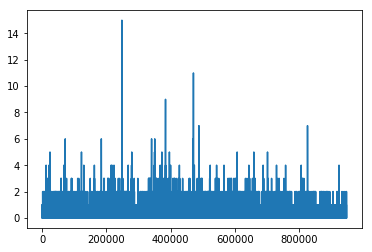

In [176]:
plt.plot(tip['likes'])
plt.show()